In [2]:
import cv2
import os
import torch 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
classes = {
    'neutral': 0,
    'happy': 1,
    'sad': 2,
    'surprised': 3,
    'fearful': 4,
    'disgusted': 5,
    'angry': 6,
    'contempt': 7,
    'none': 8,
    'uncertain': 9,
    'no-face': 10
}

def FER_2013_to_DataFrame(path_dataset, verbose=False):
    df = pd.DataFrame(columns=['path_img', 'class'])

    for file in os.listdir(path_dataset):
        if file.endswith('.csv'):
            path = path_dataset + file
            if verbose:
                print(f'----- Found a csv file -----')
            df = pd.read_csv(path)
            if verbose:
                print(f'----- Finished processing-----')
            return df

    for dir in os.listdir(path_dataset):
        if verbose:
            print(f'----- Processing directory {dir} -----')
        for class_dir in os.listdir(path_dataset + dir):
            if verbose:
                print(f'Getting data from the class {class_dir}...')
            for file in os.listdir(path_dataset + dir + '/' + class_dir):
                if file.endswith('.png'):
                    path = path_dataset + dir + '/' + class_dir + '/' + file
                    df = pd.concat([df, pd.DataFrame({'path_img': [path], 'class': [classes[class_dir]]})], ignore_index=True)

    df = df.sort_values(by=['class'], ascending=True)
    df = df.reset_index(drop=True)
    df.to_csv(path_dataset + 'fer2013.csv', index=False)
    if verbose:
        print(f'----- Finished processing csv saved in {path_dataset}fer2013.csv -----')
    return df

def display_FER_2013_dataframe(df, n_per_class=5):
    n_classes = max(df['class'])+1
    fig, axs = plt.subplots(nrows=n_classes, ncols=n_per_class + 1, figsize=(n_per_class, n_classes))
    for label in range(max(df['class'])+1):
        axs[label, 0].text(0.5, 0.5, df[df['class'] == label].iloc[0]['path_img'].split('/')[-2], fontsize=16, ha='center', va='center')
        axs[label, 0].axis('off')
        for i in range(n_per_class):
            img = cv2.imread(df[df['class'] == label].iloc[i]['path_img'])
            axs[label, i+1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            axs[label, i+1].axis('off')
    plt.show()


dir = './Datasets_processed/FER-2013/'
df = FER_2013_to_DataFrame(dir, verbose=True)

----- Found a csv file -----
----- Finished processing-----


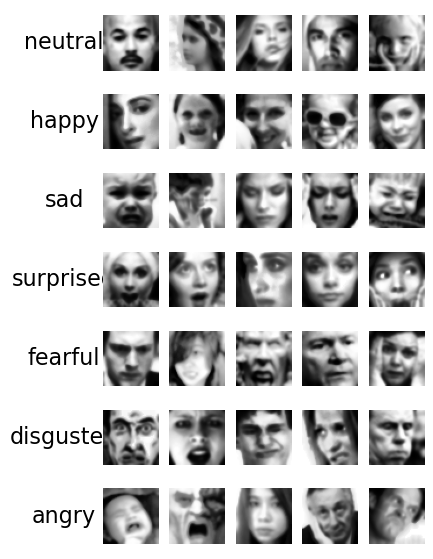

In [53]:
display_FER_2013_dataframe(df)